In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

(720, 960, 3)


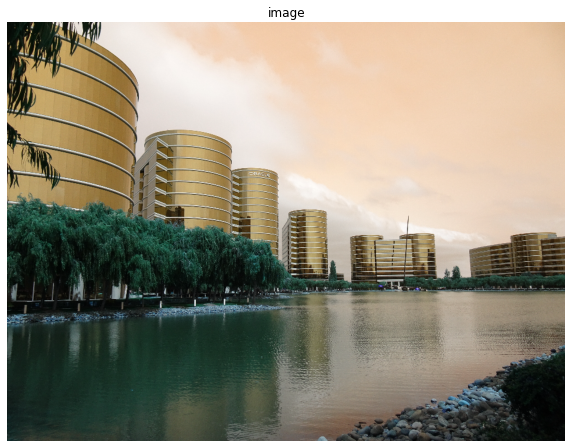

In [3]:
oracle_image = cv2.imread('oracle.jpg')
oracle_image = cv2.resize(oracle_image, (960,720))
#oracle_image = cv2.cvtColor(oracle_image, cv2.COLOR_BGR2RGB)
#bean_image = cv2.imread('mrbean.jpg')

image = oracle_image
#image = bean_image

def show_image(image, title='image'):
    print(image.shape)
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.title(title)
    plt.axis("off")  
    
show_image(image)

(720, 960)


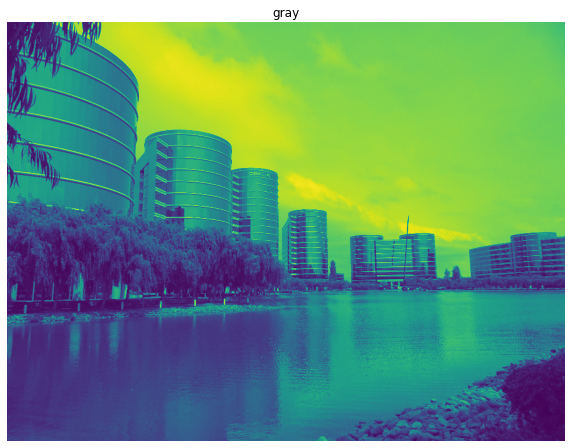

In [4]:
show_image(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY),'gray')

(720, 960)
(720, 960, 1)
(720, 960, 3)
(720, 960, 3)


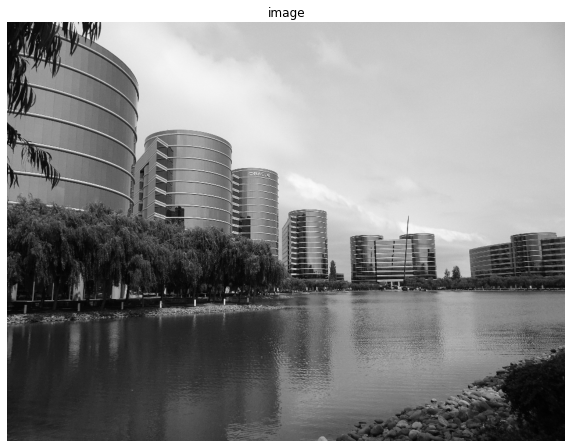

In [5]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(gray.shape)
gray = np.expand_dims(gray, axis=2)
print(gray.shape)
gray = np.concatenate((gray,gray,gray),axis=2)
print(gray.shape)
show_image(gray)

(720, 960, 3)


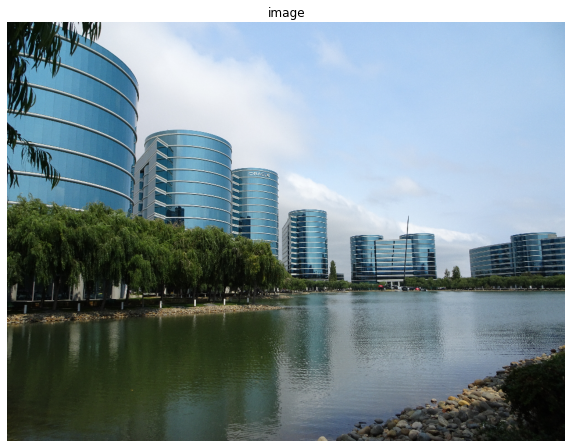

In [6]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
show_image(image)

(64, 64, 3)


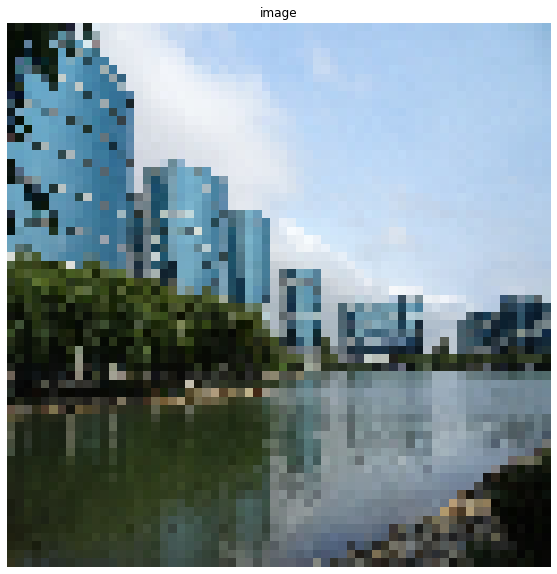

In [7]:
show_image(cv2.resize(image, (64,64)))

In [ ]:
## not very convenient
#cv2.imshow("test", image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
(720, 960, 3)


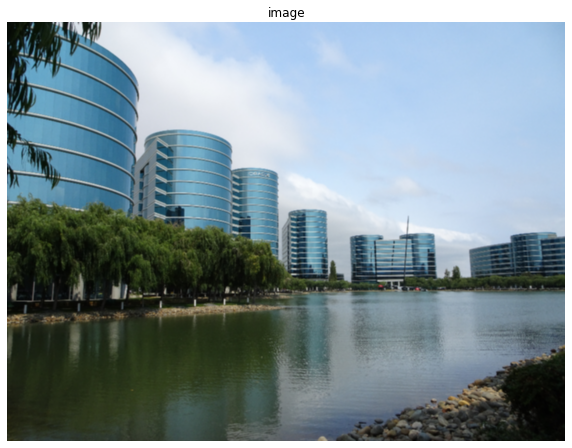

In [8]:
kernel = np.ones((3,3))/9
#kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
print(kernel)
show_image(cv2.filter2D(image,-1,kernel))

[[-1 -1 -1]
 [-1  9 -1]
 [-1 -1 -1]]
(720, 960, 3)


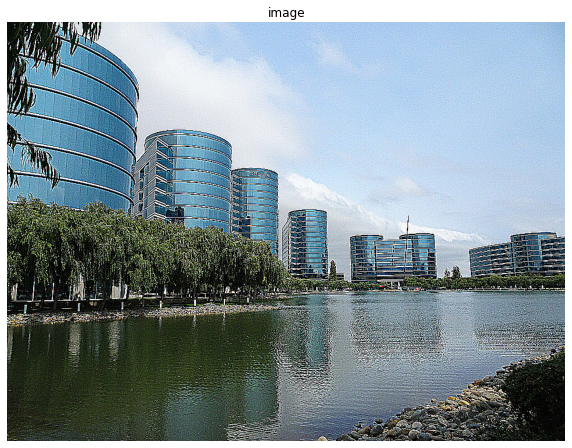

In [9]:
#kernel = np.ones((3,3))/9
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
print(kernel)
show_image(cv2.filter2D(image,-1,kernel))

[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]
(720, 960, 3)


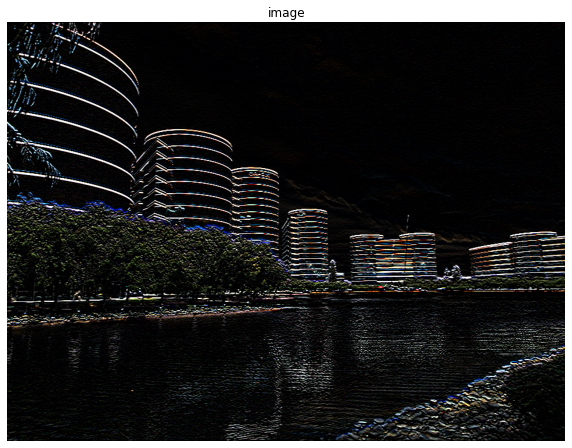

In [10]:

#kernel = np.ones((3,3))/9
kernel = np.array([[1,2,1], [0,0,0], [-1,-2,-1]])
print(kernel)
show_image(cv2.filter2D(image,-1,kernel))

[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
(720, 960, 3)


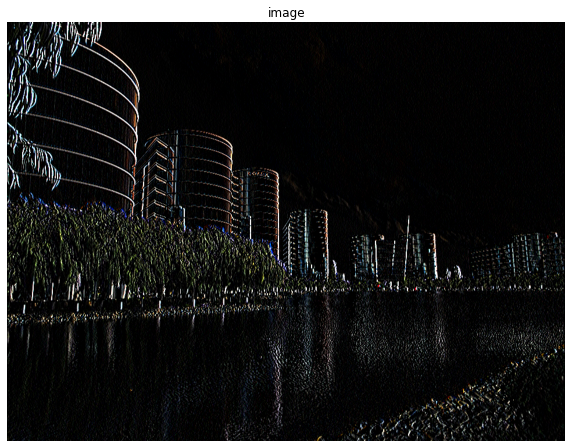

In [11]:

#kernel = np.ones((3,3))/9
kernel = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
print(kernel)
show_image(cv2.filter2D(image,-1,kernel))

(720, 960, 3)


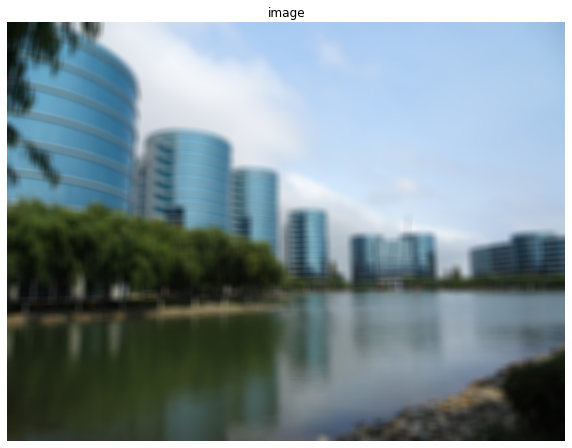

In [12]:
#blur = cv2.GaussianBlur(image,(15,15),0)
blur = cv2.GaussianBlur(src=image,ksize=(15,15), sigmaX=200, sigmaY=200)
show_image(blur)

(720, 960)


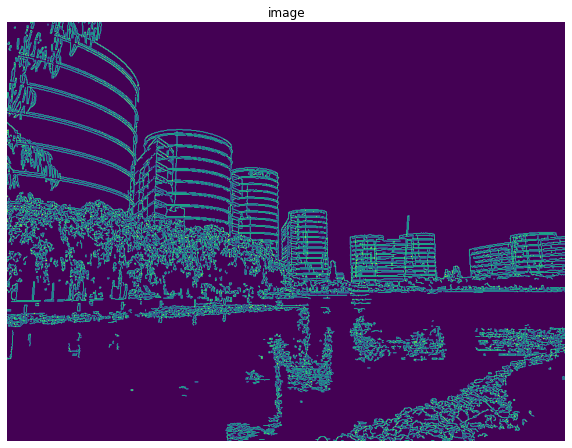

In [13]:
show_image(cv2.Canny(image,100,200))

In [14]:
cv2.imwrite('test.jpg',cv2.Canny(image,100,200))

True

(720, 960, 3)


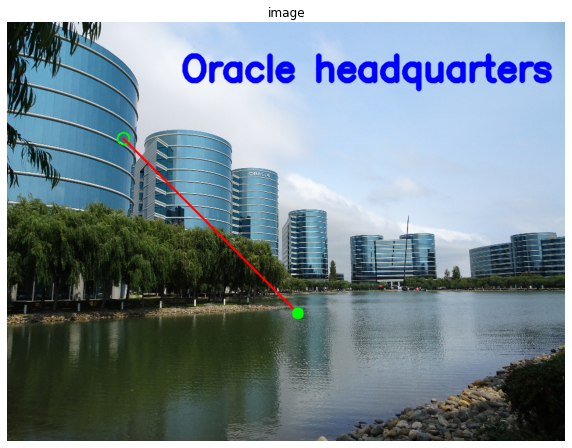

In [15]:
font = cv2.FONT_HERSHEY_SIMPLEX 
fontScale = 2
color = (0, 0, 255) # Red color in BGR  Blue in RGB
thickness = 8
text = "Oracle headquarters"

image_txt = image.copy() # methods below change the image passed as the parameter!

cv2.putText(image_txt, text, (300, 100), font, fontScale, color, thickness, cv2.LINE_AA) 
cv2.circle(image_txt, (200,200), 10, (0,255,0), 2)
cv2.line(image_txt, (200,200), (500,500), (255,0,0),3)
cv2.circle(image_txt, (500,500), 10, (0,255,0), -1)
show_image(image_txt)

(720, 960, 3)


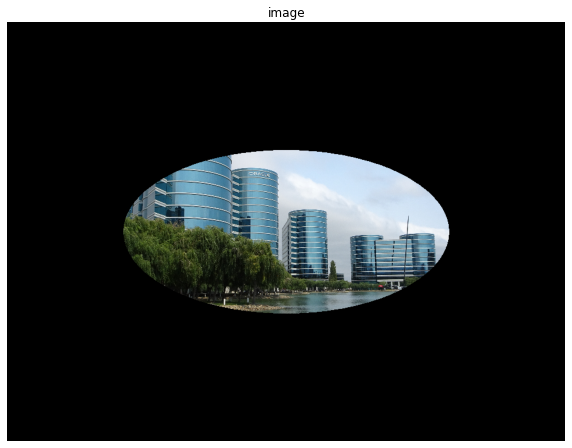

In [16]:
mask = np.zeros_like(image)
cols, rows,_ = mask.shape
mask=cv2.ellipse(mask, center=(rows//2, cols//2), axes=(280,140), 
                     angle=0, startAngle=0, endAngle=360, 
                     color=(255,255,255), thickness=-1)
image_res = np.bitwise_and(image,mask)
show_image(image_res)

Found 1 faces
(827, 697, 3)
Found 4 faces
(3672, 4896, 3)


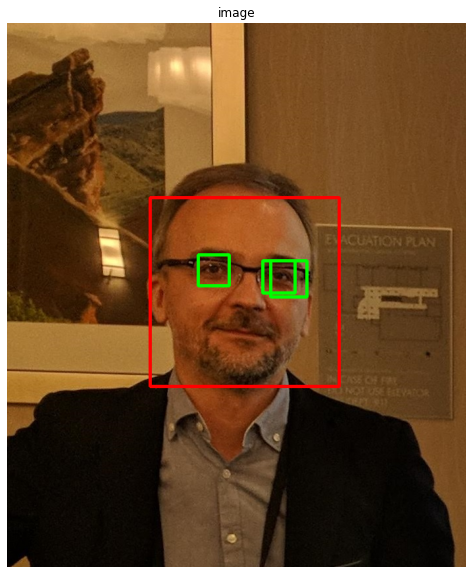

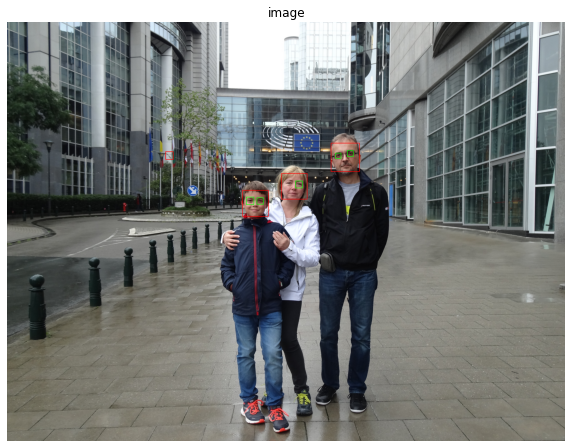

In [17]:
import numpy as np
import cv2

face_cascade = cv2.CascadeClassifier('haar/haarcascade_frontalface_alt.xml')
eye_cascade = cv2.CascadeClassifier('haar/haarcascade_eye.xml')


def detect_face_eyes(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    print("Found {} faces".format(len(faces)))
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),4)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),4)
    show_image(img)


detect_face_eyes(cv2.imread('denver.jpg'))
detect_face_eyes(cv2.imread('bruksela.jpg'))
#detect_face_eyes(cv2.imread('mrbean.jpg'))
